# Likelihood Ratio Test Analysis

In [ ]:
import sys
sys.path.append("path/to/main_folder")

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from source.ratio import likelihood_ratio_test_kde

## generate data with drift

In [3]:
# multivariate normal distribution parameters
mu_before = np.array([0, 0])
sigma_before = np.array([[1, 0], [0, 1]])
x_before = multivariate_normal.rvs(mean=mu_before, cov=sigma_before, size=500)
# generate new samples from a different distribution
mu_after = np.array([0, 0])
sigma_after = np.array([[1, 0], [0, 1]])
x_after = multivariate_normal.rvs(mean=mu_after, cov=sigma_after, size=500)

## init likelihood ratio test

In [4]:
bandwidth = 0.5
lr_statistic, p_value = likelihood_ratio_test_kde(x_before, x_after, bandwidth=bandwidth)
print(f'Likelihood Ratio statistic: {lr_statistic}, p-value: {p_value}')

Likelihood Ratio statistic: 5.5871675828047955, p-value: 0.06120148705942752


## bandwidth sensitivity

In [ ]:
# Demonstrate bandwidth sensitivity for test1
print("\nBandwidth Sensitivity Analysis: (No Drift Simulated)")
bandwidths = [0.1, 0.5, 0.7, 1.0]
alphas = [0.01]
print(f"---- Alpha={alphas[0]:.2f}")
print("-" * 50)
list_likelihood_ratios = []
list_p_values = []
for bw in bandwidths:
    lr_statistic, p_value = likelihood_ratio_test_kde(x_before, x_after, bandwidth=bw)
    list_likelihood_ratios.append(lr_statistic)
    list_p_values.append(p_value)
    print(' ')
    print(f"Bandwidth {bw:.1f}")
    is_drift = p_value < alphas[0]
    print(f"Drift Detected = {is_drift} (p-value={p_value:.6f}, LR={lr_statistic:.2f})")


Bandwidth Sensitivity Analysis: (No Drift Simulated)
---- Alpha=0.01
--------------------------------------------------
 
Bandwidth 0.1
Drift Detected = True (p-value=0.000000, LR=32.18)
 
Bandwidth 0.5
Drift Detected = False (p-value=0.061201, LR=5.59)
 
Bandwidth 0.7
Drift Detected = False (p-value=0.210592, LR=3.12)
 
Bandwidth 1.0
Drift Detected = False (p-value=0.440599, LR=1.64)


## considering different significance levels

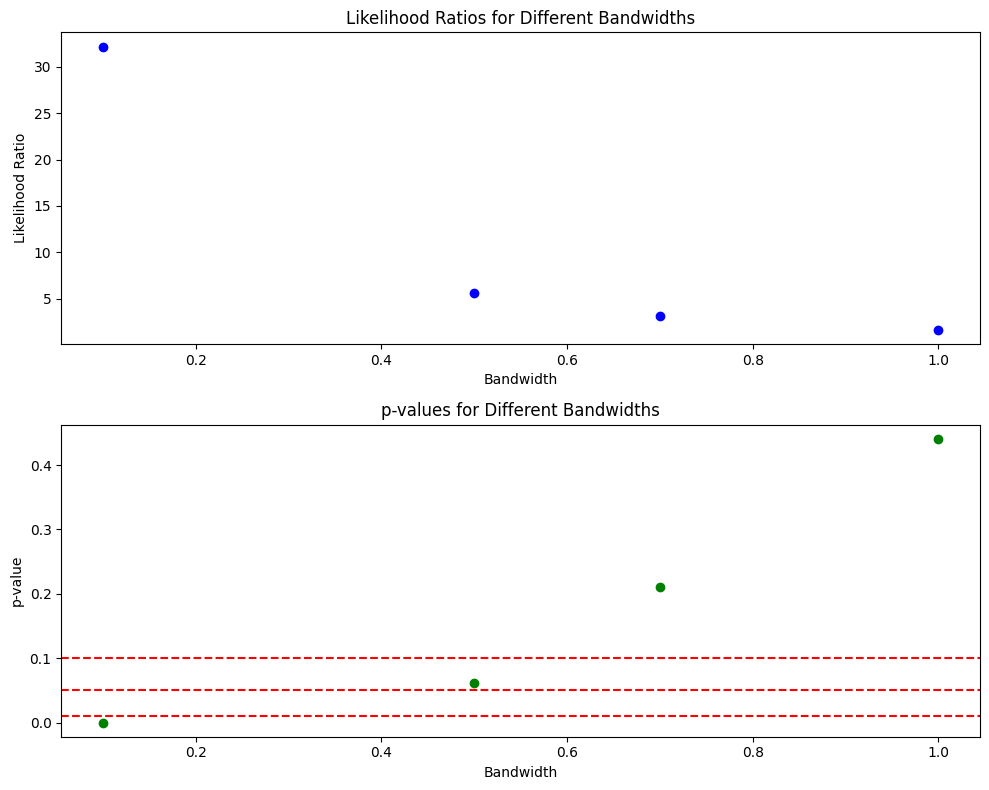

In [ ]:
import matplotlib.pyplot as plt

# plot horizontal line at alpha levels [0.01, 0.05, 0.1]
alphas = [0.01, 0.05, 0.1]
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].scatter(bandwidths, list_likelihood_ratios, color='blue')
axs[0].set_title('Likelihood Ratios for Different Bandwidths')
axs[0].set_xlabel('Bandwidth')
axs[0].set_ylabel('Likelihood Ratio')
axs[1].scatter(bandwidths, list_p_values, color='green')
for alpha in alphas:
    axs[1].axhline(y=alpha, color='red', linestyle='--', label=f'Alpha={alpha}')
axs[1].set_title('p-values for Different Bandwidths')
axs[1].set_xlabel('Bandwidth')
axs[1].set_ylabel('p-value')
plt.tight_layout()
plt.show()